In [1]:
#Importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from autots import AutoTS
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

EDA

In [2]:
#Read the data.

data = pd.read_csv("data/thyao.csv")
data

,date,close,min,max,open,volume,Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,01-02-2021,12.01,12.01,12.25,12.11,698270099,1380,7.2315,1492,16574,2292,8333,1152
1,02-02-2021,12.06,12.06,12.32,12.17,1022520339,1380,7.1501,1511,16643,2328,8368,1170
2,03-02-2021,12.15,12.06,12.22,12.14,697147084,1380,7.1627,1534,16767,2341,8430,1177
3,04-02-2021,12.20,12.14,12.29,12.21,685498137,1380,7.1453,1535,16836,2356,8465,1185
4,05-02-2021,12.16,12.16,12.47,12.32,965861098,1380,7.0917,1527,16781,2366,8437,1190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,06-02-2024,291.00,285.50,293.25,289.48,14757357592,1380,30.5626,8869,401580,13140,202597,6629
755,07-02-2024,286.00,286.00,292.00,288.39,8642863705,1380,30.5899,8843,394680,12902,199116,6509
756,08-02-2024,286.75,285.25,291.75,289.25,14742125593,1380,30.5907,8950,395715,12936,199638,6526
757,09-02-2024,294.75,286.25,294.75,288.65,10713229542,1380,30.6556,9046,406755,13269,205208,6694


In [3]:
#In Türkiye USD-TRY prices are so unstable. You can see it in 'USDTRY' column if you plot it. 
#So I will convert values to USD. It will help more accurate forecasts and also help to read the clearly.

for i in range(1,5):
    data[f"{data.columns[i]}/usd"] = data.iloc[:,1] / data.loc[:,"USDTRY"]

data

,date,close,min,max,open,volume,Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD),close/usd,min/usd,max/usd,open/usd
0,01-02-2021,12.01,12.01,12.25,12.11,698270099,1380,7.2315,1492,16574,2292,8333,1152,1.660790,1.660790,1.660790,1.660790
1,02-02-2021,12.06,12.06,12.32,12.17,1022520339,1380,7.1501,1511,16643,2328,8368,1170,1.686690,1.686690,1.686690,1.686690
2,03-02-2021,12.15,12.06,12.22,12.14,697147084,1380,7.1627,1534,16767,2341,8430,1177,1.696288,1.696288,1.696288,1.696288
3,04-02-2021,12.20,12.14,12.29,12.21,685498137,1380,7.1453,1535,16836,2356,8465,1185,1.707416,1.707416,1.707416,1.707416
4,05-02-2021,12.16,12.16,12.47,12.32,965861098,1380,7.0917,1527,16781,2366,8437,1190,1.714681,1.714681,1.714681,1.714681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,06-02-2024,291.00,285.50,293.25,289.48,14757357592,1380,30.5626,8869,401580,13140,202597,6629,9.521441,9.521441,9.521441,9.521441
755,07-02-2024,286.00,286.00,292.00,288.39,8642863705,1380,30.5899,8843,394680,12902,199116,6509,9.349491,9.349491,9.349491,9.349491
756,08-02-2024,286.75,285.25,291.75,289.25,14742125593,1380,30.5907,8950,395715,12936,199638,6526,9.373764,9.373764,9.373764,9.373764
757,09-02-2024,294.75,286.25,294.75,288.65,10713229542,1380,30.6556,9046,406755,13269,205208,6694,9.614883,9.614883,9.614883,9.614883


In [4]:
#We are dropping the columns that we are not gonna use.

data = data.drop(['Sermaye(mn TL)',
       'USDTRY', 'BIST 100', 'PiyasaDeğeri(mn TL)', 'PiyasaDeğeri(mn USD)',
       'HalkaAçık PD(mn TL)', 'HalkaAçık PD(mn USD)'], axis=1)

data

,date,close,min,max,open,volume,close/usd,min/usd,max/usd,open/usd
0,01-02-2021,12.01,12.01,12.25,12.11,698270099,1.660790,1.660790,1.660790,1.660790
1,02-02-2021,12.06,12.06,12.32,12.17,1022520339,1.686690,1.686690,1.686690,1.686690
2,03-02-2021,12.15,12.06,12.22,12.14,697147084,1.696288,1.696288,1.696288,1.696288
3,04-02-2021,12.20,12.14,12.29,12.21,685498137,1.707416,1.707416,1.707416,1.707416
4,05-02-2021,12.16,12.16,12.47,12.32,965861098,1.714681,1.714681,1.714681,1.714681
...,...,...,...,...,...,...,...,...,...,...
754,06-02-2024,291.00,285.50,293.25,289.48,14757357592,9.521441,9.521441,9.521441,9.521441
755,07-02-2024,286.00,286.00,292.00,288.39,8642863705,9.349491,9.349491,9.349491,9.349491
756,08-02-2024,286.75,285.25,291.75,289.25,14742125593,9.373764,9.373764,9.373764,9.373764
757,09-02-2024,294.75,286.25,294.75,288.65,10713229542,9.614883,9.614883,9.614883,9.614883


In [5]:
data.describe()

,close,min,max,open,volume,close/usd,min/usd,max/usd,open/usd
count,759.000000,759.000000,759.000000,759.000000,7.590000e+02,759.000000,759.000000,759.000000,759.000000
mean,97.748643,96.010540,99.554335,97.871397,5.351310e+09,4.587358,4.587358,4.587358,4.587358
std,87.509881,86.112373,89.040110,87.609457,3.828401e+09,2.904221,2.904221,2.904221,2.904221
min,10.900000,10.720000,11.230000,10.980000,2.266098e+08,1.264810,1.264810,1.264810,1.264810
25%,17.155000,16.830000,17.560000,17.235000,1.869453e+09,1.726327,1.726327,1.726327,1.726327
50%,60.150000,58.600000,60.350000,59.530000,4.834626e+09,3.348531,3.348531,3.348531,3.348531
75%,146.900000,144.200000,148.750000,146.960000,7.868383e+09,7.586107,7.586107,7.586107,7.586107
max,294.750000,289.500000,294.750000,291.600000,2.358628e+10,9.880172,9.880172,9.880172,9.880172


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       759 non-null    object 
 1   close      759 non-null    float64
 2   min        759 non-null    float64
 3   max        759 non-null    float64
 4   open       759 non-null    float64
 5   volume     759 non-null    int64  
 6   close/usd  759 non-null    float64
 7   min/usd    759 non-null    float64
 8   max/usd    759 non-null    float64
 9   open/usd   759 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 59.4+ KB


In [7]:
#Check if we have any null value.
data.isnull().sum()

date         0
close        0
min          0
max          0
open         0
volume       0
close/usd    0
min/usd      0
max/usd      0
open/usd     0
dtype: int64

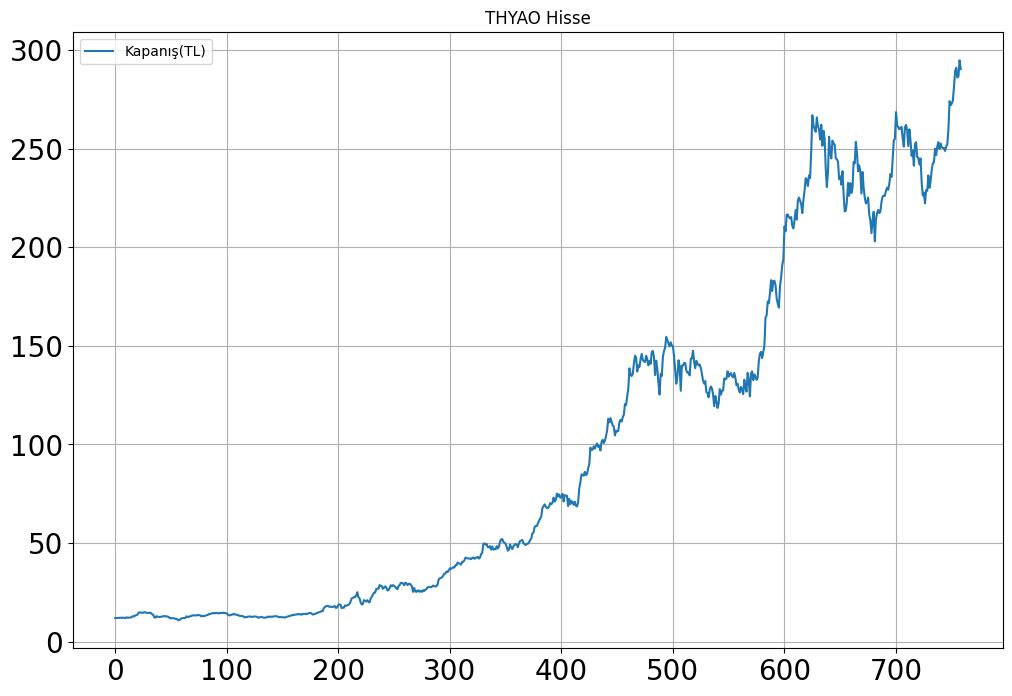

In [8]:
data["close"].plot(figsize=(12,8), title="THYAO", fontsize=20, label="Close(TL)")
plt.legend()
plt.grid()
plt.show()

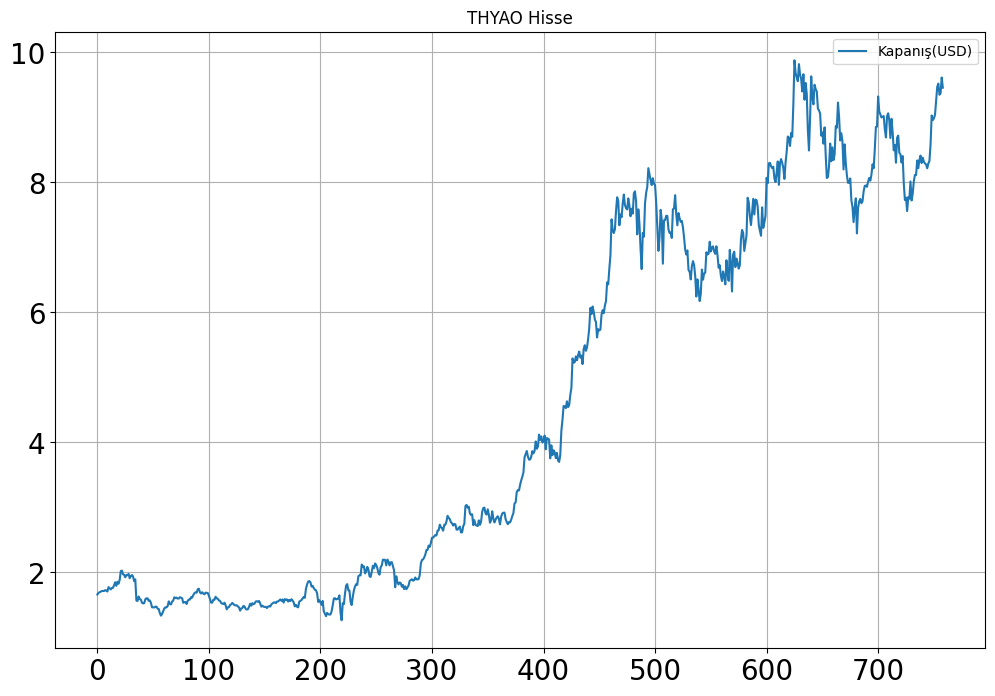

In [9]:
data["close/usd"].plot(figsize=(12,8), title="THYAO", fontsize=20, label="Close(USD)")
plt.legend()
plt.grid()
plt.show()

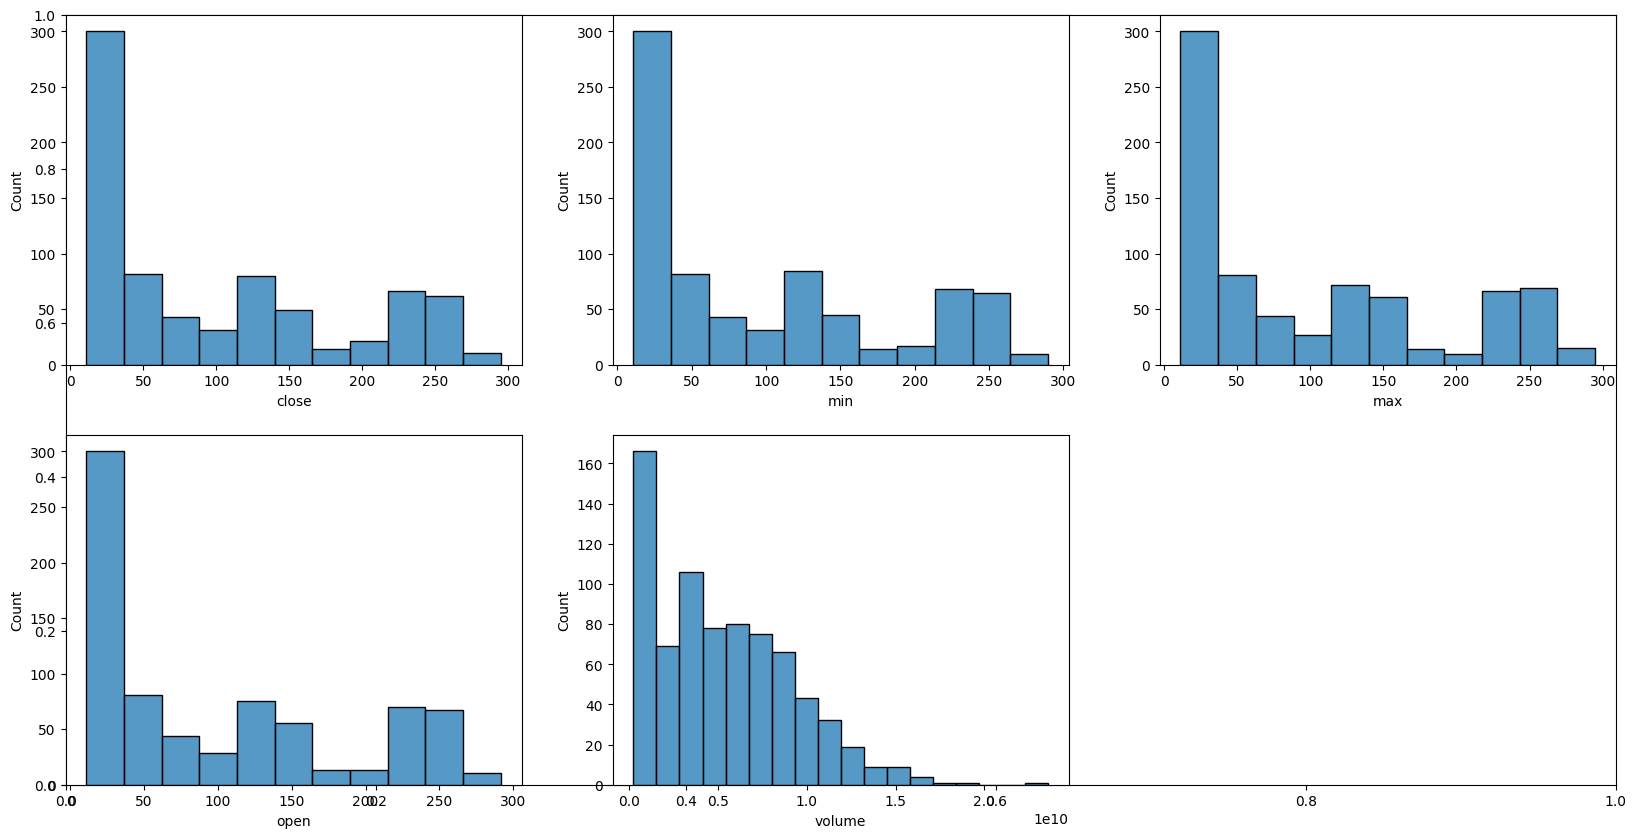

In [10]:
features = [ "close", "min", "max", "open", "volume"]

plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(data[col])
plt.show()

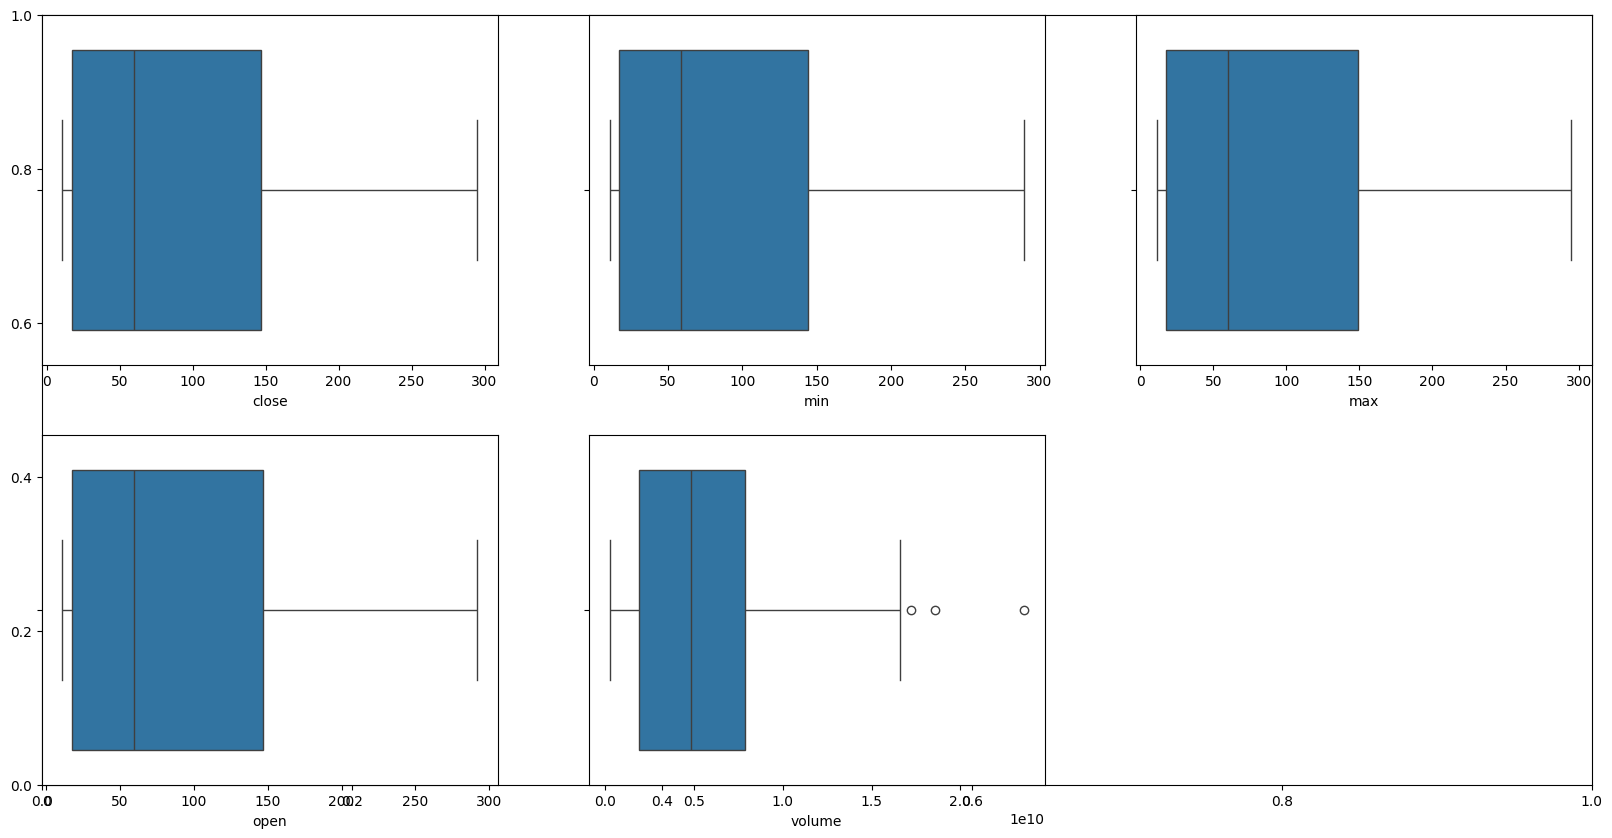

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(data[col], orient="h")
plt.show()

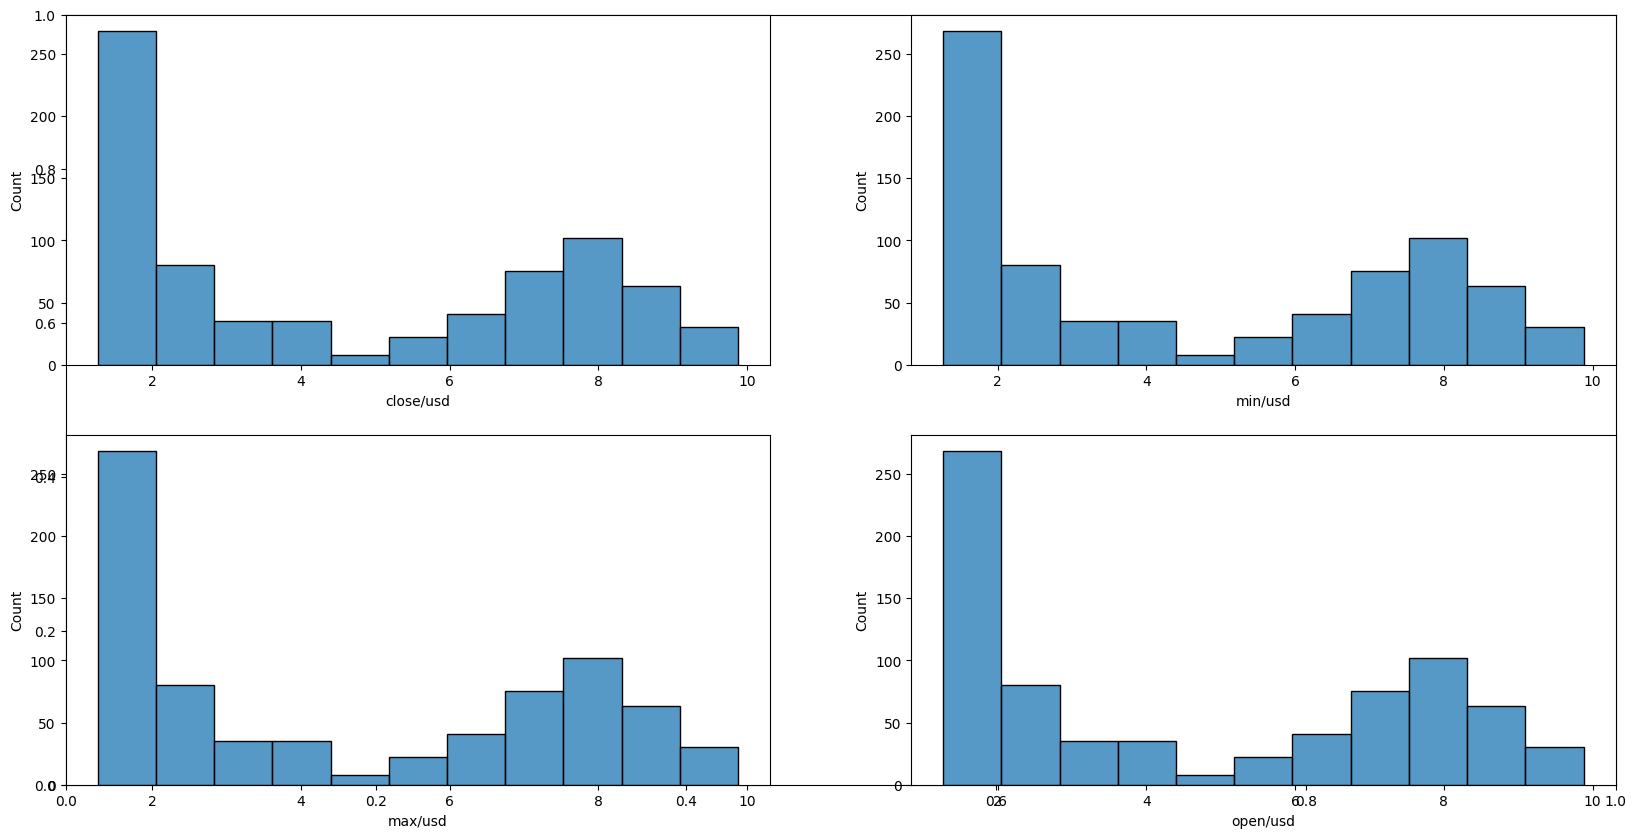

In [12]:
features = ['close/usd', 'min/usd', 'max/usd', 'open/usd']

plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.histplot(data[col])
plt.show()

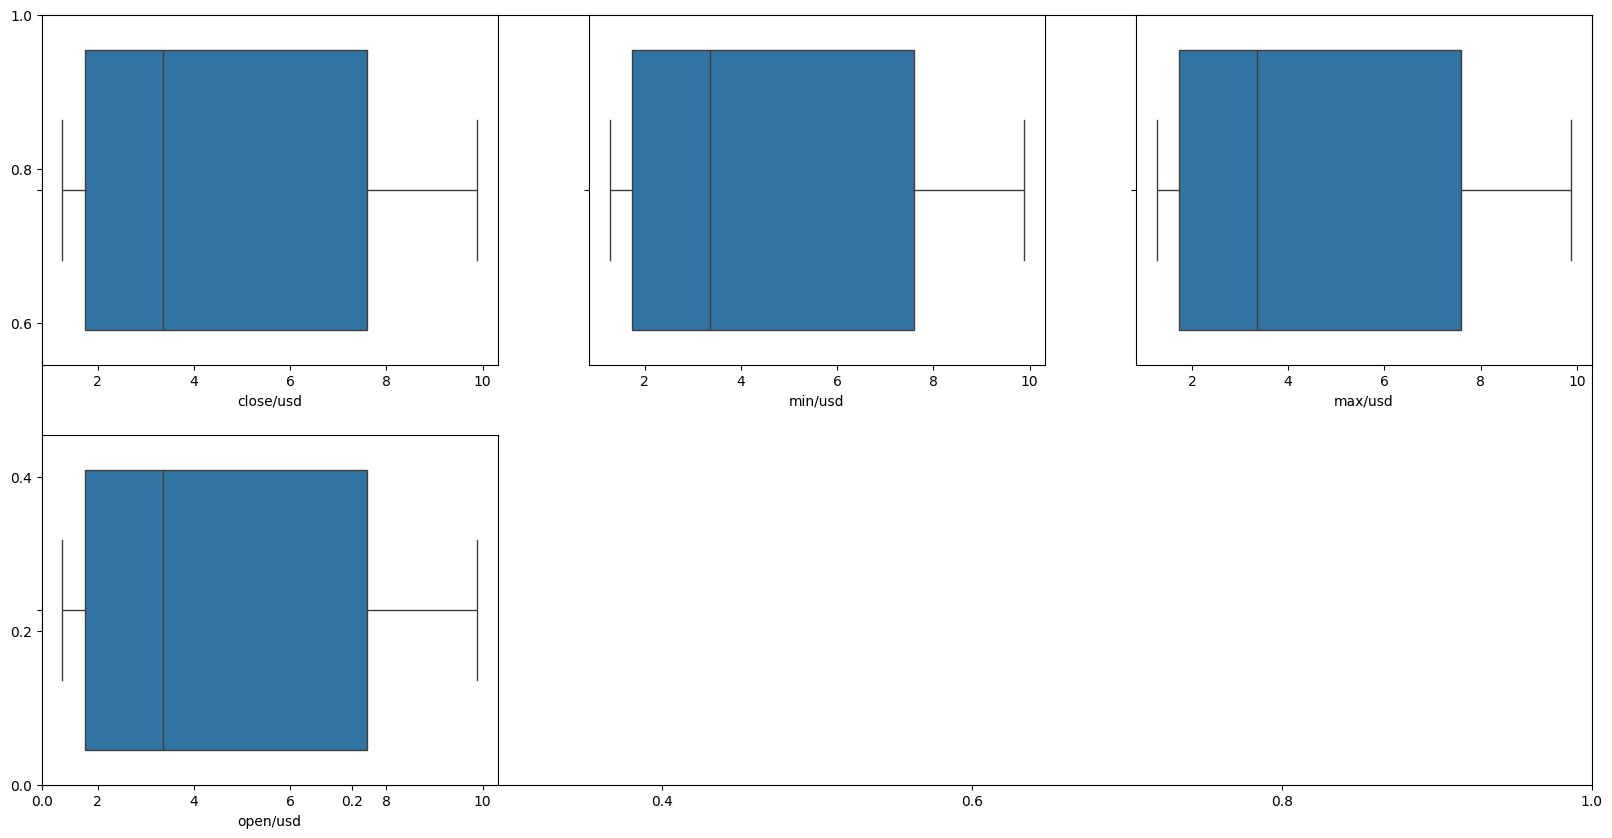

In [13]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(data[col], orient="h")
plt.show()

In [14]:
data

,date,close,min,max,open,volume,close/usd,min/usd,max/usd,open/usd
0,01-02-2021,12.01,12.01,12.25,12.11,698270099,1.660790,1.660790,1.660790,1.660790
1,02-02-2021,12.06,12.06,12.32,12.17,1022520339,1.686690,1.686690,1.686690,1.686690
2,03-02-2021,12.15,12.06,12.22,12.14,697147084,1.696288,1.696288,1.696288,1.696288
3,04-02-2021,12.20,12.14,12.29,12.21,685498137,1.707416,1.707416,1.707416,1.707416
4,05-02-2021,12.16,12.16,12.47,12.32,965861098,1.714681,1.714681,1.714681,1.714681
...,...,...,...,...,...,...,...,...,...,...
754,06-02-2024,291.00,285.50,293.25,289.48,14757357592,9.521441,9.521441,9.521441,9.521441
755,07-02-2024,286.00,286.00,292.00,288.39,8642863705,9.349491,9.349491,9.349491,9.349491
756,08-02-2024,286.75,285.25,291.75,289.25,14742125593,9.373764,9.373764,9.373764,9.373764
757,09-02-2024,294.75,286.25,294.75,288.65,10713229542,9.614883,9.614883,9.614883,9.614883


In [15]:
#Now adding day, month and year as a column so we can create new features like 'is_quarter_end' or  we can group by year so we can gain more insight from data.

splitted = (data['date']).str.split('-', expand=True)

data['day'] = splitted[0].astype('int')
data['month'] = splitted[1].astype('int')
data['year'] = splitted[2].astype('int')

data["date"] = pd.to_datetime(data.date, dayfirst=True)
data.head()


,date,close,min,max,open,volume,close/usd,min/usd,max/usd,open/usd,day,month,year
0,2021-02-01,12.01,12.01,12.25,12.11,698270099,1.660790,1.660790,1.660790,1.660790,1,2,2021
1,2021-02-02,12.06,12.06,12.32,12.17,1022520339,1.686690,1.686690,1.686690,1.686690,2,2,2021
2,2021-02-03,12.15,12.06,12.22,12.14,697147084,1.696288,1.696288,1.696288,1.696288,3,2,2021
3,2021-02-04,12.20,12.14,12.29,12.21,685498137,1.707416,1.707416,1.707416,1.707416,4,2,2021
4,2021-02-05,12.16,12.16,12.47,12.32,965861098,1.714681,1.714681,1.714681,1.714681,5,2,2021


In [16]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()

,date,close,min,max,open,volume,close/usd,min/usd,max/usd,open/usd,day,month,year,is_quarter_end
0,2021-02-01,12.01,12.01,12.25,12.11,698270099,1.660790,1.660790,1.660790,1.660790,1,2,2021,0
1,2021-02-02,12.06,12.06,12.32,12.17,1022520339,1.686690,1.686690,1.686690,1.686690,2,2,2021,0
2,2021-02-03,12.15,12.06,12.22,12.14,697147084,1.696288,1.696288,1.696288,1.696288,3,2,2021,0
3,2021-02-04,12.20,12.14,12.29,12.21,685498137,1.707416,1.707416,1.707416,1.707416,4,2,2021,0
4,2021-02-05,12.16,12.16,12.47,12.32,965861098,1.714681,1.714681,1.714681,1.714681,5,2,2021,0


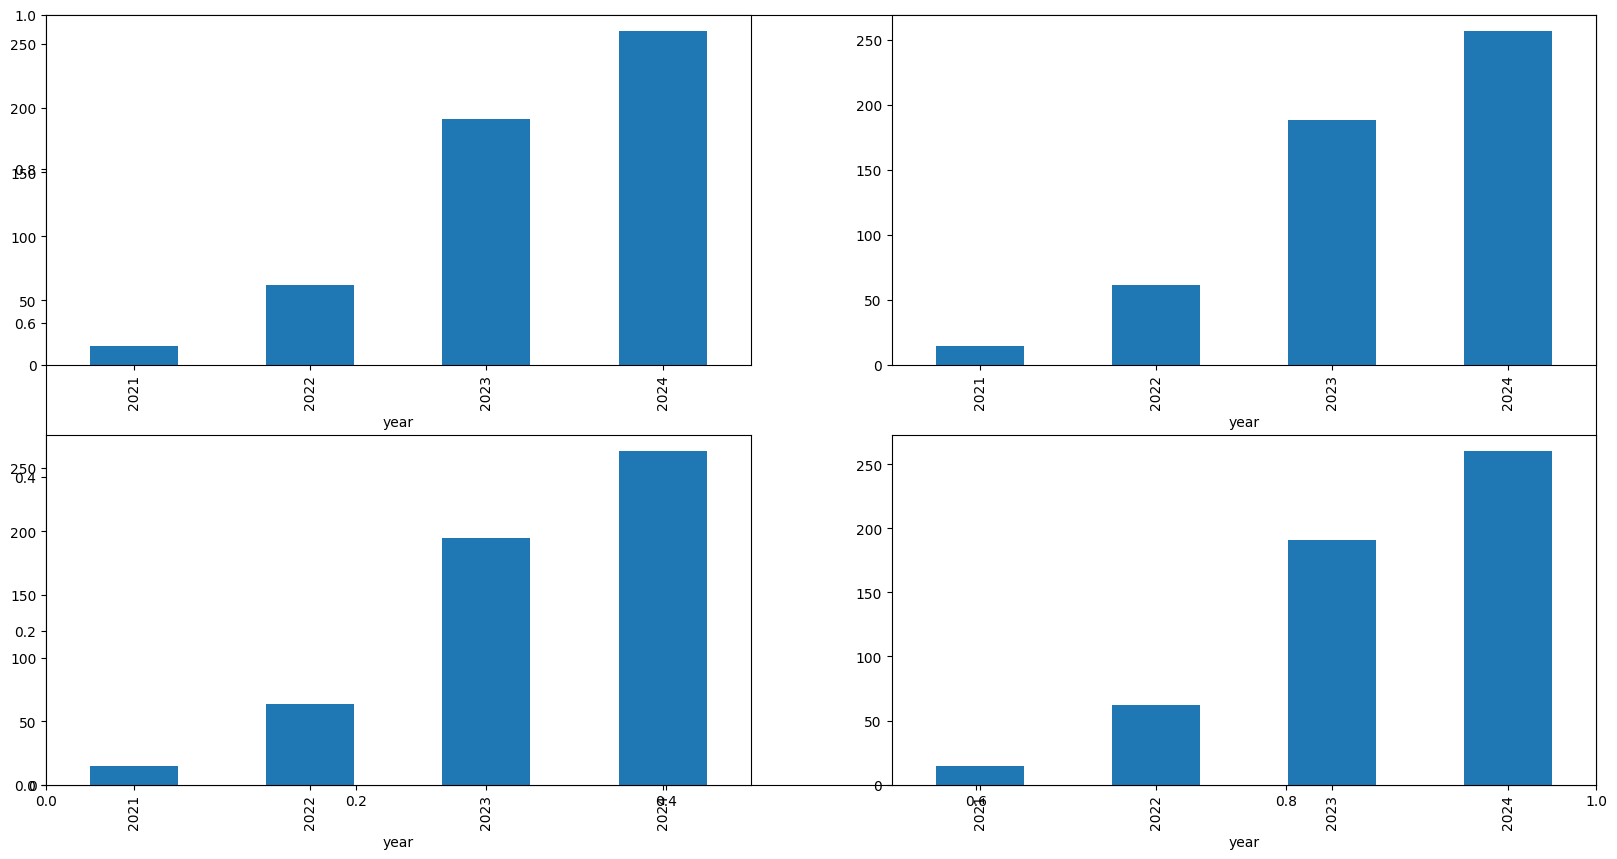

In [17]:

data_grouped = data.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['open', 'min', 'max', 'close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

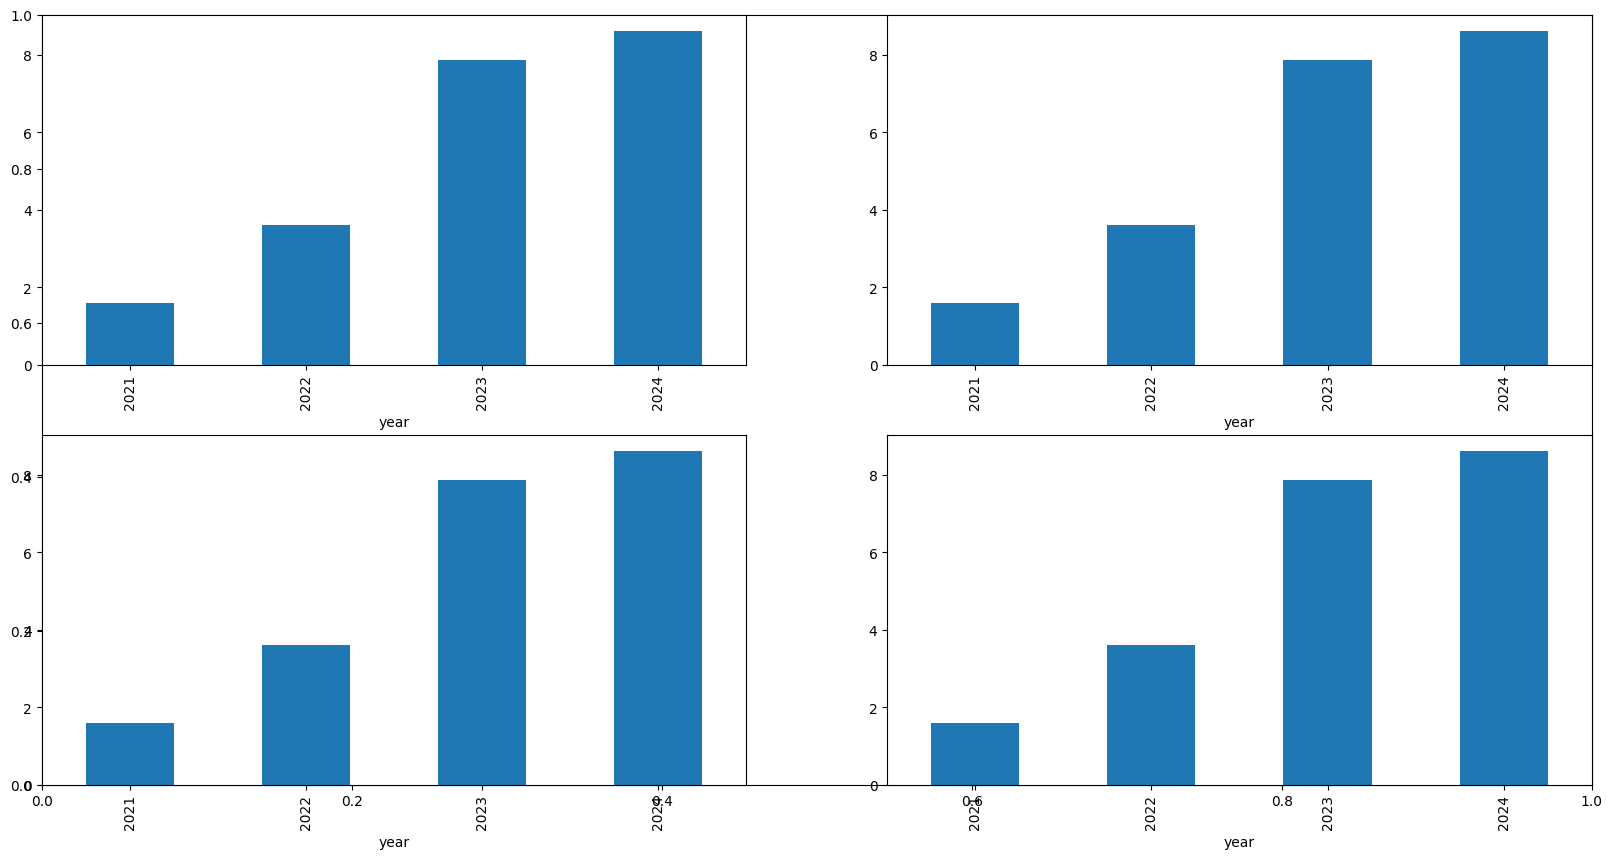

In [18]:
#THYAO doubled its prices every year (When I do this EDA current date is February 2024).

plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['open/usd', 'min/usd', 'max/usd', 'close/usd']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [19]:
#In quarter ends prices and volume are lower.

data.groupby('is_quarter_end').mean()

,date,close,min,max,open,volume,close/usd,min/usd,max/usd,open/usd,day,month,year
is_quarter_end,,,,,,,,,,,,,
0,2022-08-18 03:40:38.709677312,100.795968,98.940665,102.569798,100.863085,5.566663e+09,4.670143,4.670143,4.670143,4.670143,15.461694,6.024194,2022.171371
1,2022-07-21 22:37:52.243345920,92.001597,90.484525,93.867376,92.229278,4.945169e+09,4.431231,4.431231,4.431231,4.431231,15.745247,7.460076,2021.977186


In [53]:
data.to_csv("data/processed_thyao.csv", index=False, index_label=False)

Training

In [25]:
start = datetime.now()
start_time = start.strftime("%H:%M:%S")
print("Start Time =", start_time)


model = AutoTS(
    forecast_length=15,
    frequency='infer',
    prediction_interval=0.9,
    ensemble= 'all',
    #max_generations=3,
    num_validations=2,
    #validation_method='seasonal 364',
    model_list='fast',
    #transformer_list='all',
    models_to_validate=0.2,
    drop_most_recent=1,
    n_jobs='auto',
)

model = model.fit(data, date_col='date', value_col='close/usd', id_col=None)

finish = datetime.now()
finish_time = finish.strftime("%H:%M:%S")
print("Finish Time =", finish_time)

print((finish - start))

Start Time = 14:54:30
Using 3 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model DatepartRegression in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 20
Model Number: 9 with model ETS in generation 0 of 20
Model Number: 10 with model GLM in generation 0 of 20
Model Number: 11 with model GLM in generation 0 of 20
Model Number: 12 with model GLS in generation 0 of 20
Model Number: 13 with m

In [24]:
data.tail()

,date,close,min,max,open,volume,close/usd,min/usd,max/usd,open/usd,day,month,year,is_quarter_end
754,2024-02-06,291.00,285.50,293.25,289.48,14757357592,9.521441,9.521441,9.521441,9.521441,6,2,2024,0
755,2024-02-07,286.00,286.00,292.00,288.39,8642863705,9.349491,9.349491,9.349491,9.349491,7,2,2024,0
756,2024-02-08,286.75,285.25,291.75,289.25,14742125593,9.373764,9.373764,9.373764,9.373764,8,2,2024,0
757,2024-02-09,294.75,286.25,294.75,288.65,10713229542,9.614883,9.614883,9.614883,9.614883,9,2,2024,0
758,2024-02-12,290.25,289.50,294.00,291.60,13047070691,9.458403,9.458403,9.458403,9.458403,12,2,2024,0


THYAO Stock Forecast
            close/usd
2024-02-12   9.283584
2024-02-13   9.350572
2024-02-14   9.427092
2024-02-15   9.692878
2024-02-16   9.131920
2024-02-19   9.372524
2024-02-20   9.335784
2024-02-21   9.255183
2024-02-22   9.164647
2024-02-23   8.618744
2024-02-26   9.151903
2024-02-27   9.181560
2024-02-28   9.234388
2024-02-29   9.243563
2024-03-01   8.761314
Initiated AutoTS object with best model: 
Ensemble
{}
{'model_name': 'Mosaic', 'model_count': 9, 'smoothing_window': None, 'model_metric': 'mosaic', 'models': {'f09d6db5bab8244d3be6ce2a077c1ce6': {'Model': 'MAR', 'ModelParameters': '{"seasonality": 4, "family": "gaussian", "maxiter": 200}', 'TransformationParameters': '{"fillna": "ffill", "transformations": {"0": "RegressionFilter"}, "transformation_params": {"0": {"sigma": 3, "rolling_window": 90, "run_order": "season_first", "regression_params": {"regression_model": {"model": "ElasticNet", "model_params": {}}, "datepart_method": "recurring", "polynomial_degree": 2, "t

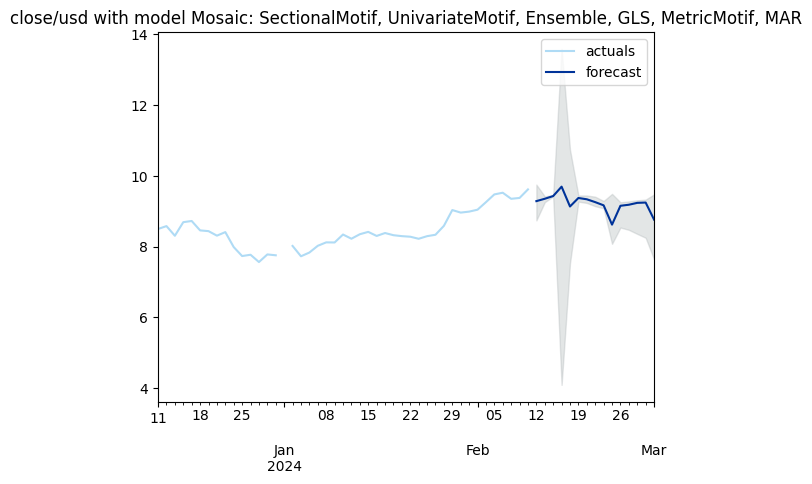

In [55]:
#Forecast results.

prediction = model.predict()
forecast = prediction.forecast
print("THYAO Stock Forecast")
print(forecast)

prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0])
# Print the details of the best model.
print(model)

In [56]:
#Converting USD to TRY.

from usd2try import usd2try

usd2try(forecast)

Live USD-TRY Value: 30.679949999999998

Forecasts

             close/usd
2024-02-12  284.819906
2024-02-13  286.875095
2024-02-14  289.222724
2024-02-15  297.377004
2024-02-16  280.166863
2024-02-19  287.548577
2024-02-20  286.421398
2024-02-21  283.948563
2024-02-22  281.170926
2024-02-23  264.422620
2024-02-26  280.779918
2024-02-27  281.689801
2024-02-28  283.310561
2024-02-29  283.592058
2024-03-01  268.796662


In [46]:
#Exporting model.
model.export_template("thyao_model.csv", models='best', n=15, max_per_model_class=3)

In [ ]:
#If you want to use saved model after:

model = AutoTS(forecast_length=forecast_length,
               frequency='infer', max_generations=0,
               num_validations=0, verbose=0)
model = model.import_template(example_filename, method='only') # method='add on'
print("Overwrite template is: {}".format(str(model.initial_template)))

#This is the template that given in AutoTS's tutorials. You can change the variable names as yours.